In [9]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

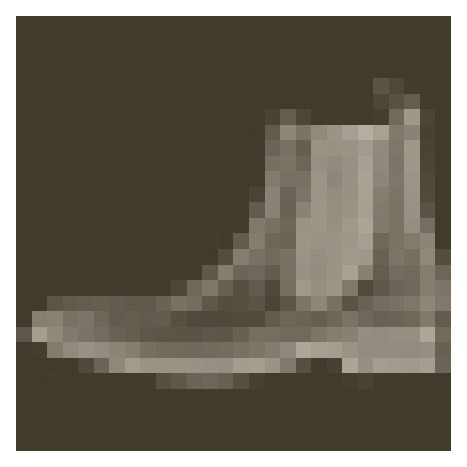

In [65]:
image, label = next(iter(trainloader))
helper.imshow(image[1]);

In [66]:
from torch import nn, optim
import torch.nn.functional as F

In [67]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.03)

epoch = 5

for e in range(epoch):
    running_loss= 5
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        ouput= model.forward(images)
        loss= criterion(ouput, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"loss {running_loss/len(trainloader)}")

loss 0.7369573349192706
loss 0.4640922088867057
loss 0.41916200221538036
loss 0.39007303995618436
loss 0.36918846449491055


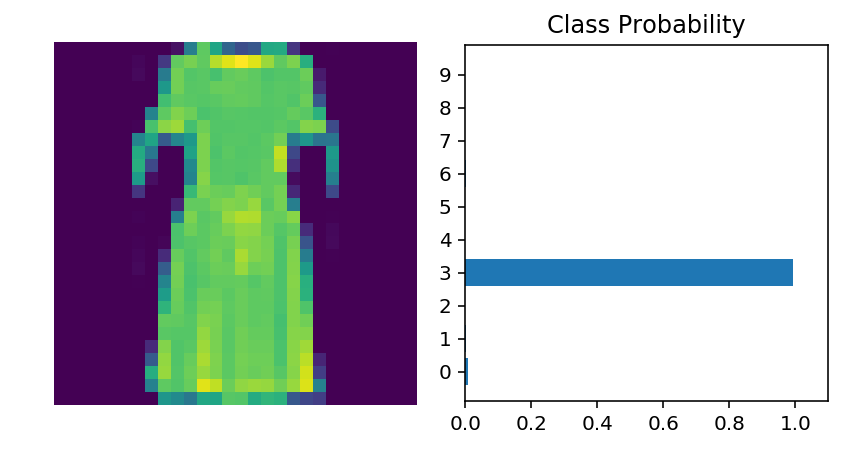

In [72]:
%matplotlib inline
import helper

images, labels = next(iter(testloader))

img = images[0].view(1,784)

with torch.no_grad(): #tun off gradients 
    logps= model.forward(img)
    
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

In [69]:
## some changes according to solution

In [52]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epoch = 5

for e in range(epoch):
    running_loss= 5
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        
        ouput= model.forward(images)
        loss= criterion(ouput, labels)
                      
        optimizer.zero_grad()                  
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"loss {running_loss}")

loss 486.2388871759176
loss 374.28402752429247
loss 334.17061365395784
loss 316.0349651873112
loss 300.52877746522427


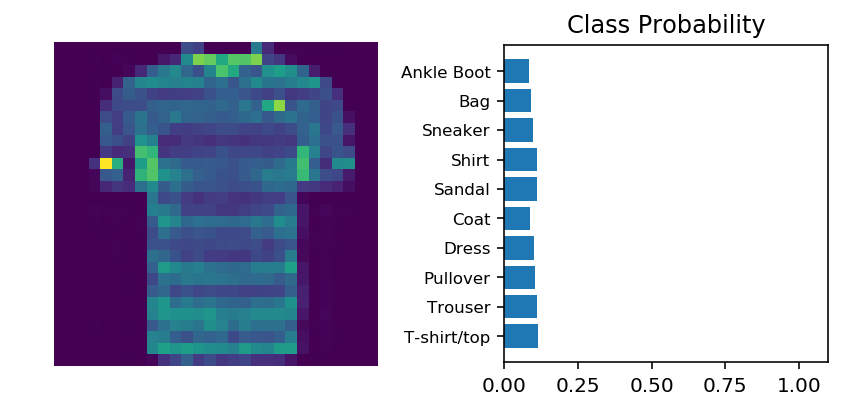

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1].view(1,784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

## original solution 

In [60]:
# TODO: Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [61]:
# TODO: Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [47]:
# TODO: Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 483.14449213445187
Training loss: 367.0775271654129
Training loss: 331.0982503294945
Training loss: 311.2673235088587
Training loss: 302.4351896941662


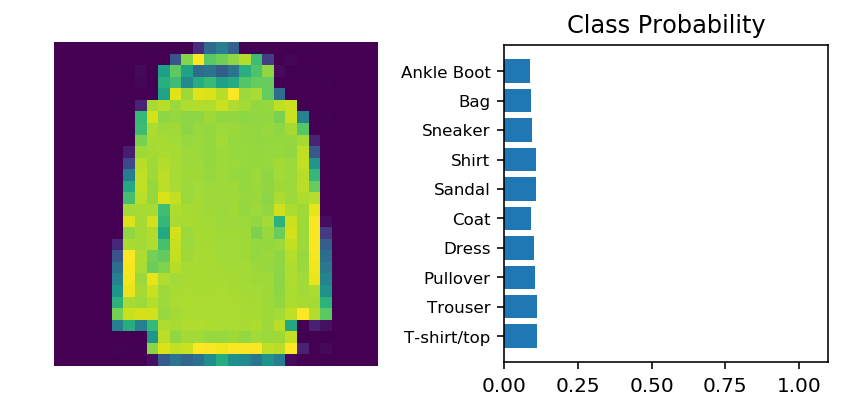

In [62]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')